# Pratical 1

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install tqdm

In [3]:
from tqdm import tqdm
import sys, os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
dataset='/content/drive/MyDrive/ratings.csv'
ratings=pd.read_csv(dataset)
ratings.head(71)

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510
...,...,...,...,...
66,1,27266,4.5,1147879365
67,1,27721,3.0,1147869115
68,1,31956,3.5,1147877610
69,1,32591,5.0,1147879538


In [4]:
ratings_reader1=[[1,4,5],[2,2,2],[1,1,3],[3,3,1],[2,1,0],[1,3,1]]

In [5]:
print(type(ratings_reader1))

<class 'list'>


In [6]:

p =random.random()
p

0.7819988754781678

In [6]:
def DataStructure(Data):
  ratings_reader=Data.to_numpy()
  user_index=0
  movie_index=0
  map_user_to_index={}
  map_index_to_user=[]
  map_movie_to_index={}
  map_index_to_movie=[]
  data_by_user_index=[]
  data_by_movie_index=[]

  for i in ratings_reader:
    if i[0] not in map_user_to_index:
      map_user_to_index[i[0]]=user_index
      map_index_to_user.append(i[0])
      data_by_user_index.append([])
      user_index += 1

    if i[1] not in map_movie_to_index:
      map_movie_to_index[i[1]]=movie_index
      map_index_to_movie.append(i[1])
      data_by_movie_index.append([])
      movie_index += 1

    up_user_index = map_user_to_index[i[0]]
    up_movie_index = map_movie_to_index[i[1]]

    data_by_user_index[up_user_index].append((up_movie_index,i[2]))
    data_by_movie_index[up_movie_index].append((up_user_index,i[2]))
  return data_by_user_index,data_by_movie_index

In [7]:
U,M = DataStructure(Data=ratings)

In [8]:
frequencyUser={}
count=0
for i in U:
  degree=len(i)
  if degree not in frequencyUser:
    frequencyUser[degree]=1
  else:
    frequencyUser[degree]+=1
  count+=1

frequencyMovie={}
count=0
for i in M:
  degree=len(i)
  if degree not in frequencyMovie:
    frequencyMovie[degree]=1
  else:
    frequencyMovie[degree]+=1
  count+=1

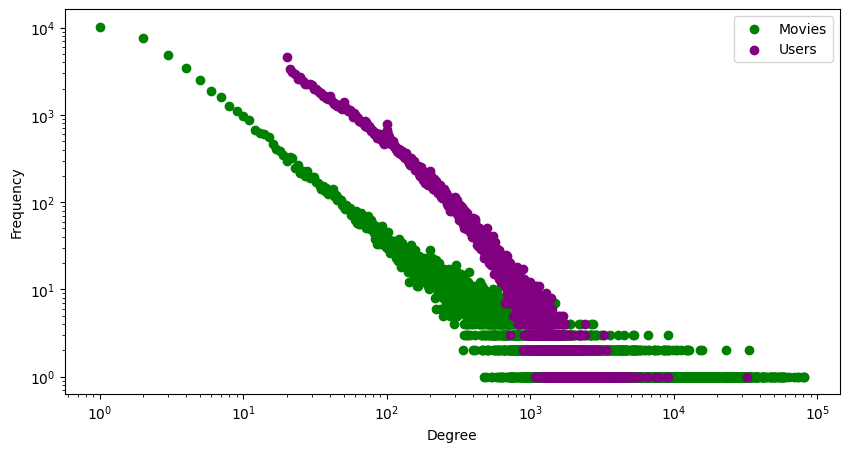

In [10]:
fig,ax=plt.subplots(figsize=(10,5))
ax.scatter(frequencyMovie.keys(),frequencyMovie.values(),label='Movies',color='green')
ax.scatter(frequencyUser.keys(),frequencyUser.values(),label='Users',color='purple')
#ax.set_title("Degree distribution")
ax.set_xlabel("Degree")
ax.set_ylabel("Frequency")
ax.legend()

plt.yscale('log')
plt.xscale('log')
plt.savefig('Degree_Distribution.pdf')
plt.show()

# Pratice 2

## 1.   Download a smaller MovieLens dataset to develop and debug with, and again index it

In [11]:
dataset='/content/drive/MyDrive/ratings-small.csv'
ratings2=pd.read_csv(dataset)
ratings2.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


## 2.   Split the small data set into a training and a test set.





In [13]:
len(ratings2)

100836

In [5]:
def DataStructure_split(Data):
  ratings_reader=Data.to_numpy()
  user_index=0
  movie_index=0
  map_user_to_index={}
  map_index_to_user=[]
  map_movie_to_index={}
  map_index_to_movie=[]
  data_by_user_index_train=[]
  data_by_user_index_test=[]
  data_by_movie_index_train=[]
  data_by_movie_index_test=[]

  for i in ratings_reader:
    if i[0] not in map_user_to_index:
      map_user_to_index[i[0]]=user_index
      map_index_to_user.append(i[0])
      data_by_user_index_train.append([])
      data_by_user_index_test.append([])
      user_index += 1

    if i[1] not in map_movie_to_index:
      map_movie_to_index[i[1]]=movie_index
      map_index_to_movie.append(i[1])
      data_by_movie_index_train.append([])
      data_by_movie_index_test.append([])
      movie_index += 1

    up_user_index = map_user_to_index[i[0]]
    up_movie_index = map_movie_to_index[i[1]]

    p=random.random()
    if p<0.75:
      data_by_user_index_train[up_user_index].append((up_movie_index,i[2]))
      data_by_movie_index_train[up_movie_index].append((up_user_index,i[2]))
      data_by_user_index_test[up_user_index].append(())
      data_by_movie_index_test[up_movie_index].append(())
    else:
      data_by_user_index_test[up_user_index].append((up_movie_index,i[2]))
      data_by_movie_index_test[up_movie_index].append((up_user_index,i[2]))
      data_by_user_index_train[up_user_index].append(())
      data_by_movie_index_train[up_movie_index].append(())
  return data_by_user_index_train ,data_by_movie_index_train, data_by_user_index_test, data_by_movie_index_test

In [13]:
U2_train,M2_train,U2_test,M2_test=DataStructure_split(Data=ratings2)

In [ ]:

'''def Split(Data):
  Data_train=[]
  Data_test=[]
  m=len(Data)
  for i in range(m):
    Data_train.append([])
    Data_test.append([])
    random.seed(42)
    for j in range(len(Data[i])):
      p =random.random()
      if p<0.9:
        Data_train[i].append(Data[i][j])
        Data_test[i].append(())
      else:
        Data_test[i].append(Data[i][j])
        Data_train[i].append(())
  return Data_train,Data_test'''

'def Split(Data):\n  Data_train=[]\n  Data_test=[]\n  m=len(Data)\n  for i in range(m):\n    Data_train.append([])\n    Data_test.append([])\n    random.seed(42)\n    for j in range(len(Data[i])):\n      p =random.random()\n      if p<0.9:\n        Data_train[i].append(Data[i][j])\n        Data_test[i].append(())\n      else:\n        Data_test[i].append(Data[i][j])\n        Data_train[i].append(())\n  return Data_train,Data_test'

##   data_by_user_train  and  data_by_user_test



##   data_by_movie_train  and  data_by_movie_test

##   Build a model that finds maximum likelihood estimate for user + item biases with alternating least squares

In [ ]:
    # Calculation for test data_set
    #loss_test=Loss_function(data_by_user_test,user_biases,items_biases)
    #mrse_test=MSRE(data_by_user_test,user_biases,items_biases)
    # Updating for the test data_set
    #list_of_rmse_test.append(mrse_test)
    #list_of_losses_test.append(loss_test)

In [16]:
U2_train[0]

[(0, 4.0),
 (),
 (2, 4.0),
 (3, 5.0),
 (4, 5.0),
 (5, 3.0),
 (6, 5.0),
 (7, 4.0),
 (8, 5.0),
 (9, 5.0),
 (),
 (11, 5.0),
 (12, 3.0),
 (13, 5.0),
 (14, 4.0),
 (),
 (16, 3.0),
 (17, 3.0),
 (18, 5.0),
 (),
 (20, 4.0),
 (21, 5.0),
 (22, 4.0),
 (23, 3.0),
 (24, 4.0),
 (25, 5.0),
 (26, 4.0),
 (27, 3.0),
 (28, 5.0),
 (29, 4.0),
 (),
 (31, 5.0),
 (32, 4.0),
 (33, 4.0),
 (),
 (35, 5.0),
 (36, 5.0),
 (37, 3.0),
 (38, 5.0),
 (39, 3.0),
 (40, 4.0),
 (),
 (42, 3.0),
 (43, 4.0),
 (),
 (45, 5.0),
 (46, 5.0),
 (47, 4.0),
 (),
 (49, 3.0),
 (),
 (51, 5.0),
 (52, 5.0),
 (53, 5.0),
 (54, 3.0),
 (),
 (56, 5.0),
 (57, 4.0),
 (58, 5.0),
 (),
 (60, 5.0),
 (),
 (),
 (63, 4.0),
 (64, 5.0),
 (65, 5.0),
 (66, 4.0),
 (67, 5.0),
 (68, 5.0),
 (69, 5.0),
 (70, 5.0),
 (71, 5.0),
 (72, 4.0),
 (),
 (),
 (75, 4.0),
 (76, 2.0),
 (77, 5.0),
 (),
 (),
 (),
 (81, 5.0),
 (),
 (83, 3.0),
 (84, 4.0),
 (85, 5.0),
 (86, 5.0),
 (87, 5.0),
 (88, 5.0),
 (89, 5.0),
 (90, 5.0),
 (91, 4.0),
 (92, 3.0),
 (93, 3.0),
 (),
 (95, 3.0),
 (96

In [14]:
## Loss function
def Loss_function(Data,user_biases,items_biases,lambdA,gamma):
  U=len(Data)
  loss=0
  for u in range(U):
    for Data_u in Data[u]:
      if Data_u==():
        continue
      else:
        (m,r)=Data_u
        predict=user_biases[u]+items_biases[m]
        loss+= (r-predict)**2
  loss=(0.5)*lambdA*loss
  u_b=sum([x**2 for x in user_biases])
  m_b=sum([x**2 for x in items_biases])
  total_loss=(loss+0.5*gamma*(u_b+m_b))
  return total_loss

## RMSE
def MSRE(Data,user_biases,items_biases):
  counter=0
  error=0
  for u in range(len(Data)):
    for Data_u in Data[u]:
      if Data_u==():
        continue
      else:
        (m,r)=Data_u
        error+=(r-(user_biases[u]+items_biases[m]))**2
        counter+=1
  error=error/counter if counter > 0 else 0
  return np.sqrt(error)

In [15]:
y=np.zeros(5)
x=y[1]=2
x,y

(2, array([0., 2., 0., 0., 0.]))

In [16]:
def model (Data_by_user, Data_by_movie,iteration_number,lambdA,gamma):
  list_of_rmse = []
  list_of_losses= []
  U=len(Data_by_user)
  M=len(Data_by_movie)
  users_biases=np.random.randn(U)
  items_biases=np.random.randn(M)
  for i in tqdm(range(iteration_number),desc='interation in progress'):
    ## user_bias update
    for u in range(U):
      u_bias=0
      item_counter=0
      for Data_u in Data_by_user[u]:
        if Data_u==():
          continue
        else:
          (m,r)=Data_u
          u_bias+=(r-items_biases[m])
          item_counter+=1
      users_biases[u]=(lambdA*u_bias)/(lambdA*item_counter+gamma)

    ## movie_bias update
    for m in range(M):
      m_bias=0
      user_counter=0
      for Data_m in Data_by_movie[m]:
        if Data_m==():
          continue
        else:
          (u,r)=Data_m
          m_bias+=(r-users_biases[u])
          user_counter+=1
      items_biases[m]=(lambdA*m_bias)/(lambdA*user_counter+gamma)

    # Calculation and  Updating of Losss
    losses=Loss_function(Data_by_user,users_biases,items_biases,lambdA,gamma)
    list_of_losses.append(losses)

    # Calculation and  Updating of Losss
    mrse=MSRE(Data_by_user,users_biases,items_biases)
    list_of_rmse.append(mrse)

  return list_of_rmse,list_of_losses

In [17]:
list_of_rmse_train,list_of_losses_train=model (Data_by_user=U2_train, Data_by_movie=M2_train,iteration_number=10,lambdA=0.1,gamma=0.001)

interation in progress: 100%|██████████| 10/10 [00:02<00:00,  4.45it/s]


In [18]:
list_of_rmse_test,list_of_losses_test=model(Data_by_user=U2_test,Data_by_movie=M2_test,iteration_number=10,lambdA=0.1,gamma=0.001)

interation in progress: 100%|██████████| 10/10 [00:00<00:00, 11.29it/s]


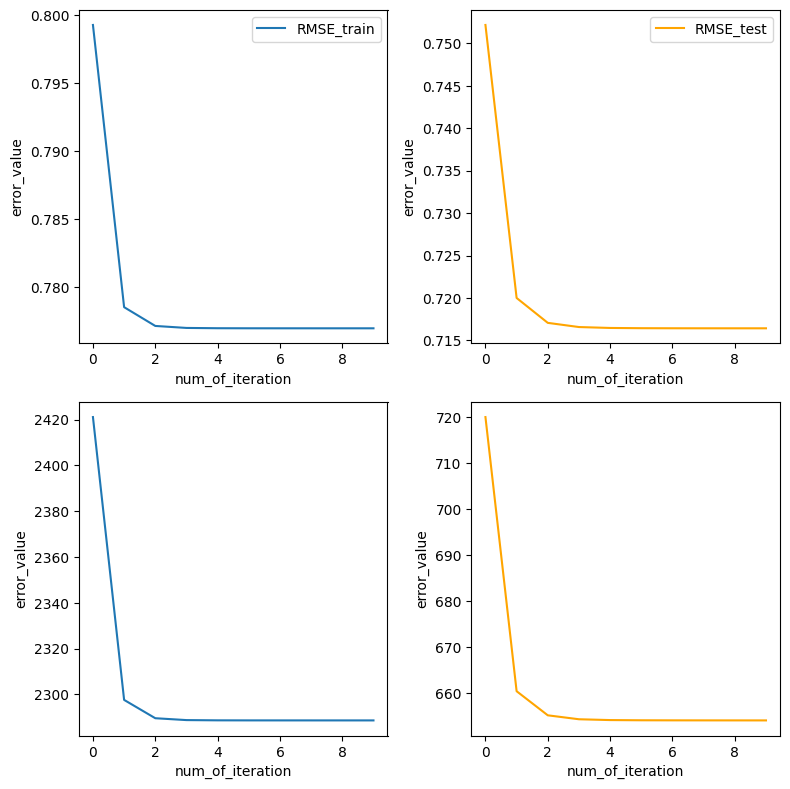

In [20]:
## The plotting
fig,axes=plt.subplots(2,2,figsize=(8,8))
## train plot
axes[0,0].plot(list_of_rmse_train,label='RMSE_train')
#axes[0,0].plot(list_of_rmse_test,label='RMSE_test')
axes[0,0].set_ylim()
axes[0,0].legend()
#axes[0,0].set_title('rmse of train')
axes[0,0].set_xlabel("num_of_iteration")
axes[0,0].set_ylabel('error_value')

#axes[0].plot(list_of_rmse_test,label='RMSE_test')
axes[0,1].plot(list_of_rmse_test,label='RMSE_test',color='orange')
axes[0,1].set_ylim()
axes[0,1].legend()
#axes[0,1].set_title('rmse of test set')
axes[0,1].set_xlabel("num_of_iteration")
axes[0,1].set_ylabel('error_value')

## test plot (list_of_losses_train,label='losses_train')
axes[1,0].plot(list_of_losses_train,label='losses_train')
#axes[1].plot(list_of_losses_test,label='losses_test')
#axes[1,0].set_title( 'loss of train set')
axes[1,0].set_xlabel("num_of_iteration")
axes[1,0].set_ylabel('error_value')

## test plot (list_of_losses_test,label='losses_test')
#axes[1].plot(list_of_losses_train,label='losses_train')
axes[1,1].plot(list_of_losses_test,label='losses_test',color='orange')
#axes[1,1].set_title( 'loss of test set')
axes[1,1].set_xlabel("num_of_iteration")
axes[1,1].set_ylabel('error_value')

plt.tight_layout()
plt.savefig('Pratice2.pdf')
plt.show()

# Pratice 3

## A model with embeddings

In [21]:
## Loss function
def Embeddings_Loss_function(Data,user_vector,movie_vector,users_biases,items_biases,lambdA,gamma):
  U=len(Data)
  #users_biases=np.random.randn(U)
  #items_biases=np.random.randn(M)
  loss=0
  for u in range(U):
    for Data_u in Data[u]:
      if Data_u==():
        continue
      else:
        (m,r)=Data_u
        predict= np.dot(user_vector[u].T,movie_vector[m])+ users_biases[u]+items_biases[m]
        loss+= (r-predict)**2
  loss=(0.5)*lambdA*loss
  u_b=sum([x**2 for x in users_biases])
  m_b=sum([x**2 for x in items_biases])
  total_loss=(loss+0.5*gamma*(u_b+m_b))
  return total_loss

In [22]:
## RMSE
def Embeddings_MSRE(Data,user_vector,movie_vector,users_biases,items_biases):
  counter=0
  error=0
  for u in range(len(Data)):
    for Data_u in Data[u]:
      if Data_u==():
        continue
      else:
        (m,r)=Data_u
        error+=(r-(np.dot(user_vector[u].T,movie_vector[m])+users_biases[u]+items_biases[m]))**2
        counter+=1
  error=error/counter if counter > 0 else 0
  return np.sqrt(error)

In [23]:
def Embedding_model (Data_by_user, Data_by_movie,iteration_number,lambdA,gamma,tao,k):
  list_of_rmse = []
  list_of_losses= []
  U=len(Data_by_user)
  M=len(Data_by_movie)
  users_biases=np.random.randn(U)
  items_biases=np.random.randn(M)
  std=np.sqrt(k)
  user_vector=np.random.normal(loc=0, scale = 1/std, size=(U,k))
  movie_vector=np.random.normal(loc=0, scale = 1/std, size=(M,k))
  for i in tqdm(range(iteration_number),desc='interation in progress'):
    ## user_bias update
    for u in range(U):
      #SumVV=np.zeros((k,k))
      #SumrV=np.zeros(k)
      u_bias=0
      item_counter=0
      for Data_u in Data_by_user[u]:
        if Data_u==():
          continue
        else:
          (m,r)=Data_u
          u_bias+=(r-(np.dot(user_vector[u].T,movie_vector[m])+items_biases[m]))
          #diff= r-user_latent[u]-movie_latent[m]
          #SumrV+=diff*movie_latent[m]
          #SumVV+=np.dot(movie_latent[m],movie_latent[m])
          item_counter+=1
      users_biases[u]=(lambdA*u_bias)/(lambdA*item_counter+gamma)
      #user_latent[u]=np.dot(np.linalg.inv(lambdA*SumVV+gamma*np.eye(k)),lambdA*SumrV)

    ## user_vector update
    for u in range(U):
      SumVV=np.zeros((k,k))
      SumrV=np.zeros(k)
      #u_bias=0
      #item_counter=0
      for Data_u in Data_by_user[u]:
        if Data_u==():
          continue
        else:
          (m,r)=Data_u
          #u_bias+=(r-(np.dot(user_latent[u].T,movie_latent[m])+items_biases[m]))
          diff= r-user_vector[u]-movie_vector[m]
          SumrV+=diff*movie_vector[m]
          SumVV+=np.outer(movie_vector[m],movie_vector[m])
          #item_counter+=1
      #users_biases[u]=(lambdA*u_bias)/(lambdA*item_counter+gamma)
      user_vector[u]=np.dot(np.linalg.inv(lambdA*SumVV+tao*np.eye(k)),lambdA*SumrV)


    ## movie_bias update
    for m in range(M):
      #SumUU=np.zeros((k,k))
      #SumrU=np.zeros(k)
      m_bias=0
      user_counter=0
      for Data_m in Data_by_movie[m]:
        if Data_m==():
          continue
        else:
          (u,r)=Data_m
          m_bias+=(r-np.dot(user_vector[u].T,movie_vector[m])-users_biases[u])
          #diff= r-users_biases[u]-items_biases[m]
          #SumrU+=diff*user_latent[u]
          #SumUU+=np.dot(user_latent[u],user_latent[u])
          user_counter+=1
      items_biases[m]=(lambdA*m_bias)/(lambdA*user_counter+gamma)
      #movie_latent[m]=np.dot(np.linalg.inv(lambdA*SumUU+gamma*np.eye(k)),lambdA*SumrU)

    ## movie_vector update
    for m in range(M):
      SumUU=np.zeros((k,k))
      SumrU=np.zeros(k)
      #m_bias=0
      #user_counter=0
      for Data_m in Data_by_movie[m]:
        if Data_m==():
          continue
        else:
          (u,r)=Data_m
          #m_bias+=(r-np.dot(user_vector[u].T,movie_vector[m])-users_biases[u])
          diff= r-users_biases[u]-items_biases[m]
          SumrU+=diff*user_vector[u]
          SumUU+=np.outer(user_vector[u],user_vector[u])
          #user_counter+=1
      #items_biases[m]=(lambdA*m_bias)/(lambdA*user_counter+gamma)
      movie_vector[m]=np.dot(np.linalg.inv(lambdA*SumUU+tao*np.eye(k)),lambdA*SumrU)

    # Calculation and Updating Loss
    losses=Embeddings_Loss_function(Data_by_user,user_vector,movie_vector,users_biases,items_biases,lambdA,gamma)
    list_of_losses.append(losses)
    # Calculation and Updating RMSE
    mrse=Embeddings_MSRE(Data_by_user,user_vector,movie_vector,users_biases,items_biases)
    list_of_rmse.append(mrse)
  return list_of_rmse,list_of_losses

In [24]:
list_rmse_train,list_losses_train=Embedding_model (Data_by_user= U2_train, Data_by_movie= M2_train,iteration_number=10,lambdA=0.01,gamma=0.001,tao=0.9,k=10)

interation in progress: 100%|██████████| 10/10 [00:51<00:00,  5.14s/it]


In [25]:
list_rmse_test,list_losses_test=Embedding_model (Data_by_user= U2_test, Data_by_movie= M2_test,iteration_number=10,lambdA=0.01,gamma=0.001,tao=0.9,k=10)

interation in progress: 100%|██████████| 10/10 [00:18<00:00,  1.90s/it]


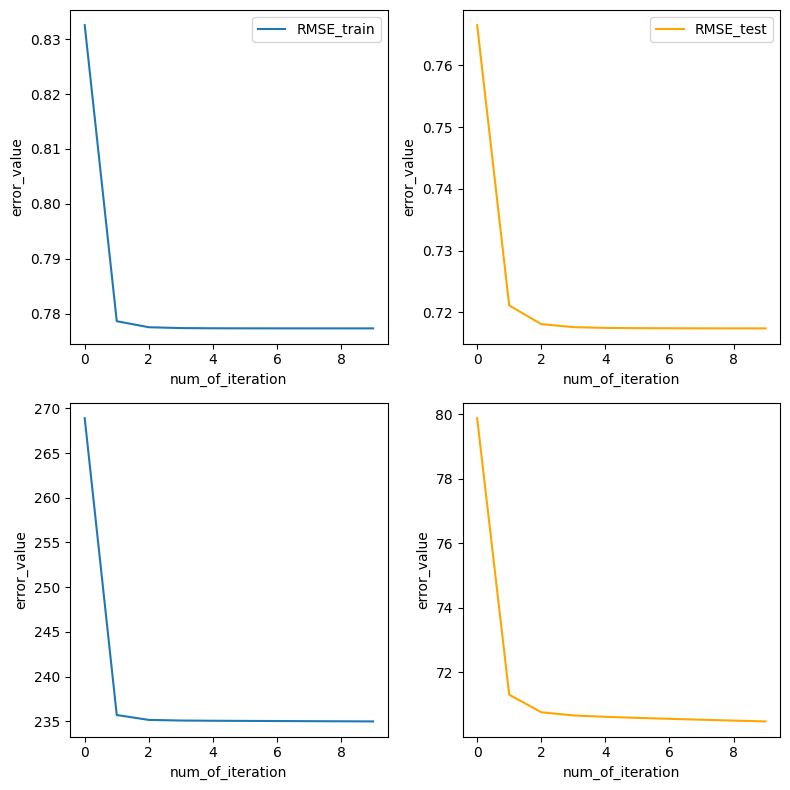

In [26]:
## The plotting
fig,axes=plt.subplots(2,2,figsize=(8,8))
## train plot
axes[0,0].plot(list_rmse_train,label='RMSE_train')
#axes[0,0].plot(list_of_rmse_test,label='RMSE_test')
axes[0,0].set_ylim()
axes[0,0].legend()
#axes[0,0].set_title('rmse of train')
axes[0,0].set_xlabel("num_of_iteration")
axes[0,0].set_ylabel('error_value')

#axes[0].plot(list_of_rmse_test,label='RMSE_test')
axes[0,1].plot(list_rmse_test,label='RMSE_test',color='orange')
axes[0,1].set_ylim()
axes[0,1].legend()
#axes[0,1].set_title('rmse of test set')
axes[0,1].set_xlabel("num_of_iteration")
axes[0,1].set_ylabel('error_value')

## test plot (list_of_losses_train,label='losses_train')
axes[1,0].plot(list_losses_train,label='losses_train')
#axes[1].plot(list_of_losses_test,label='losses_test')
#axes[1,0].set_title( 'loss of train set')
axes[1,0].set_xlabel("num_of_iteration")
axes[1,0].set_ylabel('error_value')

## test plot (list_of_losses_test,label='losses_test')
#axes[1].plot(list_of_losses_train,label='losses_train')
axes[1,1].plot(list_losses_test,label='losses_test',color='orange')
#axes[1,1].set_title( 'loss of test set')
axes[1,1].set_xlabel("num_of_iteration")
axes[1,1].set_ylabel('error_value')

plt.tight_layout()
plt.savefig('Pratice3.pdf')
plt.show()

# Pratice 4

In [6]:
U1_train,M1_train,U1_test,M1_test=DataStructure_split(Data=ratings)

In [7]:
def Big_Embeddings_MSRE(Data,user_vector,movie_vector,users_biases,items_biases):
  counter=0
  error=0
  for u in range(len(Data)):
    for Data_u in Data[u]:
      if Data_u==():
        continue
      else:
        (m,r)=Data_u
        error+=(r-(np.dot(user_vector[u].T,movie_vector[m])+users_biases[u]+items_biases[m]))**2
        counter+=1
  error=error/counter if counter > 0 else 0
  return np.sqrt(error)

In [8]:
def Big_Embedding_model (Data_by_user, Data_by_movie,iteration_number,lambdA,gamma,tao,k):
  list_of_rmse = []
  #list_of_losses= []
  U=len(Data_by_user)
  M=len(Data_by_movie)
  users_biases=np.random.randn(U)
  items_biases=np.random.randn(M)
  std=np.sqrt(k)
  user_vector=np.random.normal(loc=0, scale = 1/std, size=(U,k))
  movie_vector=np.random.normal(loc=0, scale = 1/std, size=(M,k))
  for i in tqdm(range(iteration_number),desc='interation in progress'):
    ## user_bias update
    for u in range(U):
      #SumVV=np.zeros((k,k))
      #SumrV=np.zeros(k)
      u_bias=0
      item_counter=0
      for Data_u in Data_by_user[u]:
        if Data_u==():
          continue
        else:
          (m,r)=Data_u
          u_bias+=(r-(np.dot(user_vector[u].T,movie_vector[m])+items_biases[m]))
          #diff= r-user_latent[u]-movie_latent[m]
          #SumrV+=diff*movie_latent[m]
          #SumVV+=np.dot(movie_latent[m],movie_latent[m])
          item_counter+=1
      users_biases[u]=(lambdA*u_bias)/(lambdA*item_counter+gamma)
      #user_latent[u]=np.dot(np.linalg.inv(lambdA*SumVV+gamma*np.eye(k)),lambdA*SumrV)

    ## user_vector update
    for u in range(U):
      SumVV=np.zeros((k,k))
      SumrV=np.zeros(k)
      #u_bias=0
      #item_counter=0
      for Data_u in Data_by_user[u]:
        if Data_u==():
          continue
        else:
          (m,r)=Data_u
          #u_bias+=(r-(np.dot(user_latent[u].T,movie_latent[m])+items_biases[m]))
          diff= r-user_vector[u]-movie_vector[m]
          SumrV+=diff*movie_vector[m]
          SumVV+=np.outer(movie_vector[m],movie_vector[m])
          #item_counter+=1
      #users_biases[u]=(lambdA*u_bias)/(lambdA*item_counter+gamma)
      user_vector[u]=np.dot(np.linalg.inv(lambdA*SumVV+tao*np.eye(k)),lambdA*SumrV)


    ## movie_bias update
    for m in range(M):
      #SumUU=np.zeros((k,k))
      #SumrU=np.zeros(k)
      m_bias=0
      user_counter=0
      for Data_m in Data_by_movie[m]:
        if Data_m==():
          continue
        else:
          (u,r)=Data_m
          m_bias+=(r-np.dot(user_vector[u].T,movie_vector[m])-users_biases[u])
          #diff= r-users_biases[u]-items_biases[m]
          #SumrU+=diff*user_latent[u]
          #SumUU+=np.dot(user_latent[u],user_latent[u])
          user_counter+=1
      items_biases[m]=(lambdA*m_bias)/(lambdA*user_counter+gamma)
      #movie_latent[m]=np.dot(np.linalg.inv(lambdA*SumUU+gamma*np.eye(k)),lambdA*SumrU)

    ## movie_vector update
    for m in range(M):
      SumUU=np.zeros((k,k))
      SumrU=np.zeros(k)
      #m_bias=0
      #user_counter=0
      for Data_m in Data_by_movie[m]:
        if Data_m==():
          continue
        else:
          (u,r)=Data_m
          #m_bias+=(r-np.dot(user_vector[u].T,movie_vector[m])-users_biases[u])
          diff= r-users_biases[u]-items_biases[m]
          SumrU+=diff*user_vector[u]
          SumUU+=np.outer(user_vector[u],user_vector[u])
          #user_counter+=1
      #items_biases[m]=(lambdA*m_bias)/(lambdA*user_counter+gamma)
      movie_vector[m]=np.dot(np.linalg.inv(lambdA*SumUU+tao*np.eye(k)),lambdA*SumrU)

    # Calculation and Updating Loss
    #losses=Embeddings_Loss_function(Data_by_user,user_vector,movie_vector,users_biases,items_biases,lambdA,gamma)
    #list_of_losses.append(losses)
    # Calculation and Updating RMSE
    mrse=Big_Embeddings_MSRE(Data_by_user,user_vector,movie_vector,users_biases,items_biases)
    list_of_rmse.append(mrse)
  return list_of_rmse

In [ ]:
Big_list_rmse_train=Big_Embedding_model (Data_by_user= U1_train, Data_by_movie= M1_train,iteration_number=10,lambdA=0.01,gamma=0.001,tao=2,k=10)

interation in progress:   0%|          | 0/10 [00:00<?, ?it/s]

In [ ]:
Big_list_rmse_test=Big_Embedding_model (Data_by_user= U1_test, Data_by_movie= M1_test,iteration_number=10,lambdA=0.01,gamma=0.001,tao=2,k=10)

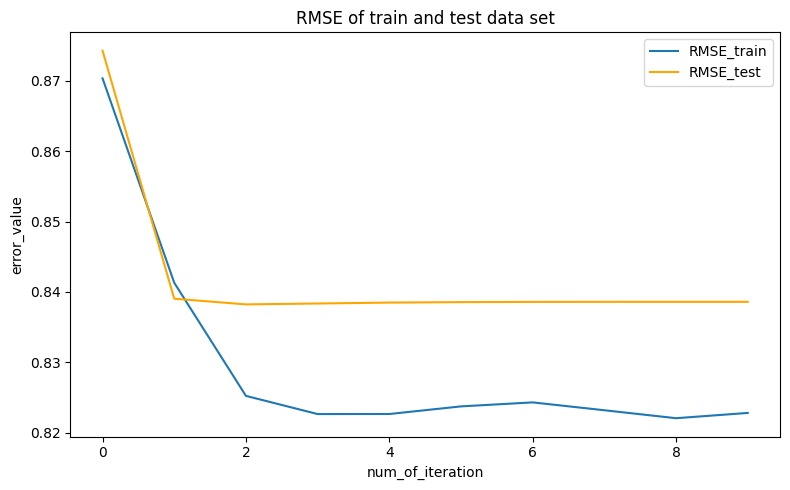

In [18]:
## The plotting
fig,axes=plt.subplots(figsize=(8,5))
## train plot
axes.plot(Big_list_rmse_train,label='RMSE_train')
axes.plot(Big_list_rmse_test,label='RMSE_test',color='orange')
#axes[0,0].plot(list_of_rmse_test,label='RMSE_test')
axes.set_ylim()
axes.legend()
axes.set_title('RMSE of train and test data set')
axes.set_xlabel("num_of_iteration")
axes.set_ylabel('error_value')

'''#axes[0].plot(list_of_rmse_test,label='RMSE_test')
axes[1].plot(Big_list_rmse_test,label='RMSE_test',color='orange')
axes[1].set_ylim()
axes[1].legend()
axes[1].set_title('rmse of test set')
axes[1].set_xlabel("num_of_iteration")
axes[1].set_ylabel('error_value')'''

'''## test plot (list_of_losses_train,label='losses_train')
axes[1,0].plot(list_losses_train,label='losses_train')
#axes[1].plot(list_of_losses_test,label='losses_test')
axes[1,0].set_title( 'loss of train set')
axes[1,0].set_xlabel("num_of_iteration")
axes[1,0].set_ylabel('error_value')

## test plot (list_of_losses_test,label='losses_test')
#axes[1].plot(list_of_losses_train,label='losses_train')
axes[1,1].plot(list_losses_test,label='losses_test',color='orange')
axes[1,1].set_title( 'loss of test set')
axes[1,1].set_xlabel("num_of_iteration")
axes[1,1].set_ylabel('error_value')
'''

plt.tight_layout()
plt.show()

In [ ]:
## The plotting
fig,axes=plt.subplots(figsize=(8,5))
## train plot
axes.plot(Big_list_rmse_train,label='RMSE_train')
axes.plot(Big_list_rmse_test,label='RMSE_test',color='orange')
#axes[0,0].plot(list_of_rmse_test,label='RMSE_test')
axes.set_ylim()
axes.legend()
#axes.set_title('RMSE of train and test data set')
axes.set_xlabel("num_of_iteration")
axes.set_ylabel('error_value')
plt.tight_layout()
plt.savefig('Pratice4.pdf')
plt.show()